# Test the ENC-DEC model

In [87]:
import numpy as np
import dataloader
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import models
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import os
import time
from torch_geometric.nn import GATv2Conv, global_mean_pool
# reload library
import importlib
import cv2
#import utils as ut
import pandas as pd
import DataDLC
from torch_geometric.data import Data, DataLoader
import tqdm


# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

In [88]:
importlib.reload(dataloader)
importlib.reload(DataDLC)
importlib.reload(models)

<module 'models' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\models.py'>

## Load dataset

**Obs:** This is just a test to see if the model is working.

In [89]:
importlib.reload(dataloader)
importlib.reload(DataDLC)

<module 'DataDLC' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\DataDLC.py'>

In [90]:

dataloader.reload_module()

In [91]:
# Load dataset .pt files
import pickle as pkl


In [6]:
# deactivate warnings
if True:
    import warnings
    warnings.filterwarnings("ignore")

    data_loader = dataloader.DLCDataLoader(r'c:\Users\jalvarez\Documents\Data\Dataset_DMDmaleMDX5CVmalefem', load_dataset=False, batch_size=1, window_size=5, stride=1, build_graph = True)


['DMD_mal_Test_10DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_11DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_12DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_13DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_14DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_15DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_16DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_17DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_18DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_19DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_1DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_20DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_21

100%|██████████| 2628/2628 [00:36<00:00, 72.02it/s]


Loading file MDXCV_fem_Test_1DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2622/2622 [00:36<00:00, 72.51it/s]


Loading file MDXCV_mal_Test_1DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2620/2620 [00:36<00:00, 72.49it/s]


Loading file DMD_mal_Test_2DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2633/2633 [00:36<00:00, 72.51it/s]


Loading file MDXCV_fem_Test_2DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2643/2643 [00:36<00:00, 71.73it/s]


Loading file MDXCV_mal_Test_2DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [00:36<00:00, 71.87it/s]


Loading file DMD_mal_Test_3DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2630/2630 [00:36<00:00, 72.08it/s]


Loading file MDXCV_fem_Test_3DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2648/2648 [00:39<00:00, 67.72it/s]


Loading file MDXCV_mal_Test_3DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2625/2625 [00:38<00:00, 68.95it/s]


Loading file DMD_mal_Test_4DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2627/2627 [00:38<00:00, 68.15it/s]


Loading file MDXCV_fem_Test_4DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2622/2622 [00:36<00:00, 71.47it/s]


Loading file MDXCV_mal_Test_4DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [00:38<00:00, 69.08it/s]


Loading file DMD_mal_Test_5DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [00:40<00:00, 65.35it/s]


Loading file MDXCV_fem_Test_5DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2631/2631 [00:40<00:00, 65.18it/s]


Loading file MDXCV_mal_Test_5DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2630/2630 [00:39<00:00, 67.20it/s]


Loading file DMD_mal_Test_6DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2632/2632 [00:40<00:00, 65.29it/s]


Loading file MDXCV_fem_Test_6DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2639/2639 [00:38<00:00, 67.79it/s]


Loading file MDXCV_mal_Test_6DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2631/2631 [00:40<00:00, 65.16it/s]


Loading file DMD_mal_Test_7DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2613/2613 [00:38<00:00, 68.17it/s]


Loading file MDXCV_fem_Test_7DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2646/2646 [00:39<00:00, 67.62it/s]


Loading file MDXCV_mal_Test_7DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2628/2628 [00:39<00:00, 66.64it/s]


Loading file DMD_mal_Test_8DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2647/2647 [00:39<00:00, 66.46it/s]


Loading file MDXCV_fem_Test_8DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2628/2628 [00:40<00:00, 64.57it/s]


Loading file MDXCV_mal_Test_8DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2631/2631 [00:40<00:00, 64.60it/s]


Loading file DMD_mal_Test_9DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [00:38<00:00, 67.79it/s]


Loading file MDXCV_fem_Test_9DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2614/2614 [00:39<00:00, 66.87it/s]


Loading file MDXCV_mal_Test_9DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [00:43<00:00, 60.00it/s]


Loading file DMD_mal_Test_10DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [00:43<00:00, 59.96it/s]


Loading file MDXCV_fem_Test_10DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2635/2635 [00:43<00:00, 60.61it/s]


Loading file MDXCV_mal_Test_10DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [00:41<00:00, 63.52it/s]


Loading file DMD_mal_Test_11DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2622/2622 [00:41<00:00, 63.84it/s]


Loading file MDXCV_fem_Test_11DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2633/2633 [00:37<00:00, 69.33it/s]


Loading file MDXCV_mal_Test_11DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [00:39<00:00, 66.30it/s]


Loading file DMD_mal_Test_12DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2630/2630 [00:39<00:00, 66.96it/s]


Loading file MDXCV_fem_Test_12DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2627/2627 [00:37<00:00, 70.67it/s]


Loading file MDXCV_mal_Test_12DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2631/2631 [00:38<00:00, 69.10it/s]


Loading file DMD_mal_Test_13DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2628/2628 [00:36<00:00, 72.69it/s]


Loading file MDXCV_fem_Test_13DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [00:36<00:00, 72.04it/s]


Loading file MDXCV_mal_Test_13DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2635/2635 [00:36<00:00, 72.25it/s]


Loading file DMD_mal_Test_14DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2619/2619 [00:36<00:00, 71.98it/s]


Loading file MDXCV_fem_Test_14DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2622/2622 [00:36<00:00, 72.00it/s]


Loading file MDXCV_mal_Test_14DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2618/2618 [00:36<00:00, 71.76it/s]


Loading file DMD_mal_Test_15DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2641/2641 [00:37<00:00, 71.31it/s]


Loading file MDXCV_fem_Test_15DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2625/2625 [00:36<00:00, 72.28it/s]


Loading file MDXCV_mal_Test_15DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2616/2616 [00:35<00:00, 73.15it/s]


Loading file DMD_mal_Test_16DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2645/2645 [00:36<00:00, 72.66it/s]


Loading file MDXCV_fem_Test_16DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [00:36<00:00, 72.77it/s]


Loading file MDXCV_mal_Test_16DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2614/2614 [00:35<00:00, 73.01it/s]


Loading file DMD_mal_Test_17DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2632/2632 [00:36<00:00, 72.79it/s]


Loading file MDXCV_fem_Test_17DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2631/2631 [00:36<00:00, 72.01it/s]


Loading file MDXCV_mal_Test_17DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2624/2624 [00:36<00:00, 72.61it/s]


Loading file DMD_mal_Test_18DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2621/2621 [00:36<00:00, 71.41it/s]


Loading file MDXCV_fem_Test_18DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [00:39<00:00, 66.43it/s]


Loading file MDXCV_mal_Test_18DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2610/2610 [00:36<00:00, 70.92it/s]


Loading file DMD_mal_Test_19DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2650/2650 [00:38<00:00, 68.15it/s]


Loading file MDXCV_fem_Test_19DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2630/2630 [00:38<00:00, 68.65it/s]


Loading file MDXCV_mal_Test_19DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [00:36<00:00, 71.76it/s]


Loading file DMD_mal_Test_20DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2624/2624 [00:36<00:00, 72.44it/s]


Loading file MDXCV_fem_Test_20DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2625/2625 [00:36<00:00, 71.87it/s]


Loading file MDXCV_mal_Test_20DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2628/2628 [00:36<00:00, 72.11it/s]


Loading file DMD_mal_Test_21DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2634/2634 [00:36<00:00, 72.30it/s]


Loading file MDXCV_fem_Test_21DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [00:37<00:00, 69.74it/s]


Loading file MDXCV_mal_Test_21DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2623/2623 [00:38<00:00, 68.08it/s]


Loading file DMD_mal_Test_22DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [00:37<00:00, 69.88it/s]


Loading file MDXCV_fem_Test_22DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [00:37<00:00, 70.69it/s]


Loading file MDXCV_mal_Test_22DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2614/2614 [00:38<00:00, 67.82it/s]


Loading file DMD_mal_Test_23DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2610/2610 [00:36<00:00, 71.32it/s]


Loading file MDXCV_fem_Test_23DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2623/2623 [00:36<00:00, 71.39it/s]


Loading file MDXCV_mal_Test_23DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2631/2631 [00:36<00:00, 72.91it/s]


Loading file DMD_mal_Test_24DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2625/2625 [00:35<00:00, 73.59it/s]


Loading file MDXCV_fem_Test_24DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [00:36<00:00, 71.73it/s]


Loading file MDXCV_mal_Test_24DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [00:36<00:00, 72.45it/s]


Loading file DMD_mal_Test_25DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2641/2641 [00:35<00:00, 73.78it/s]


Loading file MDXCV_fem_Test_25DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [00:37<00:00, 70.44it/s]


Loading file MDXCV_mal_Test_25DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2643/2643 [00:38<00:00, 69.41it/s]


Loading file DMD_mal_Test_26DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2622/2622 [00:37<00:00, 69.13it/s]


Loading file MDXCV_fem_Test_26DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2628/2628 [00:36<00:00, 71.03it/s]


Loading file MDXCV_mal_Test_26DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2622/2622 [00:41<00:00, 63.91it/s]


Loading file DMD_mal_Test_27DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [00:40<00:00, 64.15it/s]


Loading file MDXCV_fem_Test_27DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [00:40<00:00, 64.51it/s]


Loading file MDXCV_mal_Test_27DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2628/2628 [00:39<00:00, 65.90it/s]


Loading file DMD_mal_Test_28DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2627/2627 [00:39<00:00, 66.44it/s]


Loading file DMD_mal_Test_29DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2624/2624 [00:39<00:00, 65.91it/s]


Loading file DMD_mal_Test_30DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2643/2643 [00:38<00:00, 67.80it/s]


Loading file DMD_mal_Test_31DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2635/2635 [00:39<00:00, 67.29it/s]


Loading file DMD_mal_Test_32DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2627/2627 [00:38<00:00, 67.85it/s]

Number of files: 86


In [7]:
data_loader.save_dataset()

**Load**

In [92]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Load the data
dataset = torch.load(r'c:\Users\jalvarez\Documents\Data\Dataset_DMDmaleMDX5CVmalefem\dataset_large.pkl', map_location=device)

cpu


In [94]:
dataset[0].behaviour_names

Index(['General_Contacts', 'Sniffing_R', 'Poursuit_R', 'Dominance_R',
       'Rearing_R', 'Grooming_R', 'Sniffing_V', 'Poursuit_V', 'Dominance_V',
       'Rearing_V', 'Grooming_V'],
      dtype='object')

In [95]:
if False:
    for i in range(len(dataset)):
        dataset[i].y = torch.tensor([dataset[i].behaviour[1]], dtype=torch.long)
        dataset[i].frame_mask = (dataset[i].frame_mask == 2).float()

In [96]:
dataset[0].behaviour

tensor([                   0,                    0, -9223372036854775808,
        -9223372036854775808,                    0,                    0,
                           0,                    0,                    0,
                           0,                    0])

**Augmentation**

In [97]:
import augmentation

In [98]:
importlib.reload(augmentation)

<module 'augmentation' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\augmentation.py'>

In [87]:
dataset_cloned = [d.clone() for d in dataset]

In [93]:
idx_sniffR = 5
idx_sniffV = 10

augmentation.merge_symetric_behaviours(idx_sniffR, idx_sniffV, dataset_cloned)

augmentation.rotate_samples(dataset_cloned

NameError: name 'dataset_cloned' is not defined

In [89]:
dataset_cloned[-1].behaviour

tensor([                   0,                    0, -9223372036854775808,
        -9223372036854775808,                    0,                    0,
                           0,                    0,                    0,
                           0,                    0])

**only an specific behaviour**

In [90]:
if False:
    for i in range(len(dataset)):
        dataset[i].behaviour = dataset[i].behaviour[1]


In [75]:
dataset_cloned[0].behaviour

tensor([                   0,                    0, -9223372036854775808,
        -9223372036854775808,                    0,                    0,
                           0,                    0,                    0,
                           0,                    0])

In [94]:
len(dataset_cloned)

226040

## Class Balance

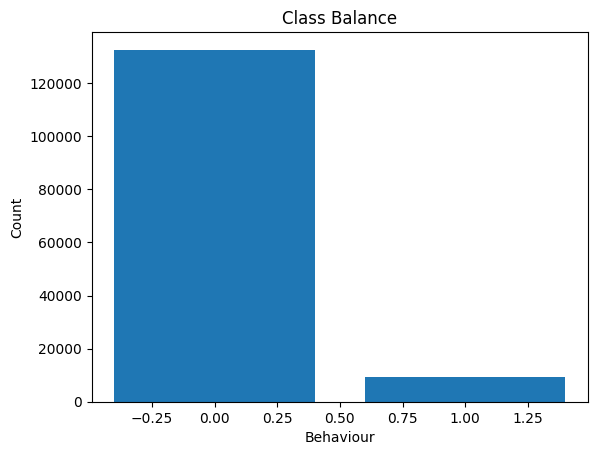

There are 9305 instances of the behaviour


In [95]:
# Class Balance
behaviour = [d.behaviour[2].item() for d in dataset_cloned]
behaviour = np.array(behaviour)
behaviour = np.unique(behaviour, return_counts=True)
#Plot
plt.bar(behaviour[0][1:], behaviour[1][1:])
plt.xlabel('Behaviour')
plt.ylabel('Count')
plt.title('Class Balance')
plt.show()

print('There are {} instances of the behaviour'.format(behaviour[1][2]))

In [96]:
# Rotate the dataset
augmentation.rotate_samples(dataset_cloned, idx_sniffR)

In [97]:
len(dataset_cloned)

263260

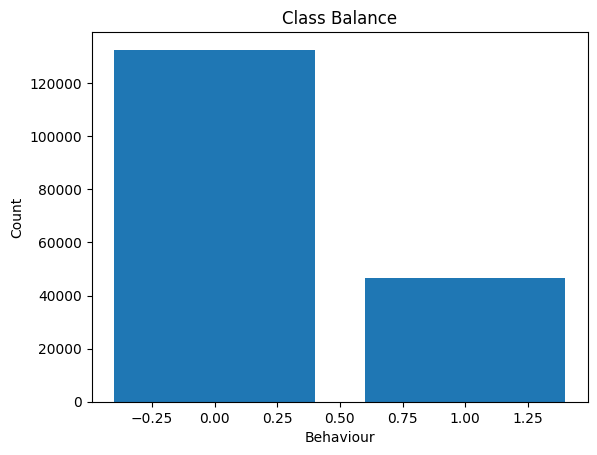

There are 46525 instances of the behaviour


In [98]:
# Class Balance
behaviour = [d.behaviour[2].item() for d in dataset_cloned]
behaviour = np.array(behaviour)
behaviour = np.unique(behaviour, return_counts=True)
#Plot
plt.bar(behaviour[0][1:], behaviour[1][1:])
plt.xlabel('Behaviour')
plt.ylabel('Count')
plt.title('Class Balance')
plt.show()

print('There are {} instances of the behaviour'.format(behaviour[1][2]))

In [99]:
ratio = behaviour[1][1] / behaviour[1][2]
print('The ratio between the two classes is {}'.format(ratio))

The ratio between the two classes is 2.8501880709296077


In [100]:
def downsample_inactive(dataset, idx_behaviour):
    ''' Shuffle before downsampling '''
    indx_inactive = []
    indx_active = []

    for i in range(len(dataset)):
        if dataset[i].behaviour[idx_behaviour] == 1:
            indx_active.append(i)
        elif dataset[i].behaviour[idx_behaviour] == 0:
            indx_inactive.append(i)

    indx_inactive = np.random.choice(indx_inactive, len(indx_active), replace=False)
    indx = np.concatenate((indx_active,  np.random.choice(indx_inactive, len(indx_active), replace=False) ))
    indx = np.random.permutation(indx)
    
    return [dataset[i] for i in indx]



            

    


In [101]:
len(dataset_cloned)

263260

In [102]:
# Downsample the inactive samples
dataset_cloned = downsample_inactive(dataset_cloned, idx_sniffR)

In [103]:
len(dataset_cloned)

93050

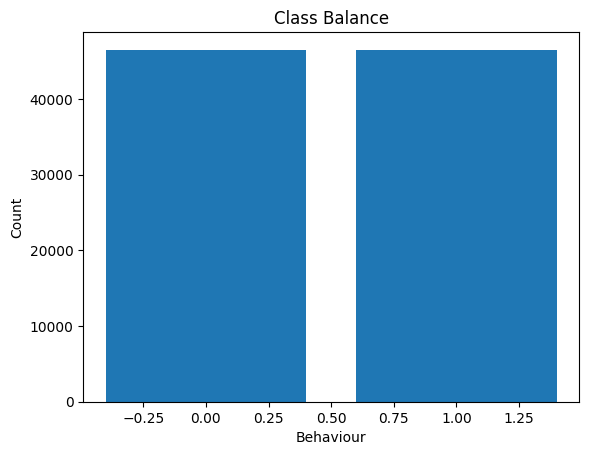

There are 46525 instances of the behaviour


In [105]:
# Class Balance
behaviour = [d.behaviour[2].item() for d in dataset_cloned]
behaviour = np.array(behaviour)
behaviour = np.unique(behaviour, return_counts=True)
#Plot
plt.bar(behaviour[0], behaviour[1])
plt.xlabel('Behaviour')
plt.ylabel('Count')
plt.title('Class Balance')
plt.show()

print('There are {} instances of the behaviour'.format(behaviour[1][1]))

### Train-Test split

**Shuffle**

In [106]:
# Suffle the dataset
np.random.seed(0)
np.random.shuffle(dataset_cloned)

In [111]:
# Split train and test
train_size = int(0.8 * len(dataset))

train_dataset = dataset[:train_size]
test_dataset = dataset[train_size:]

print('The train dataset has %d samples' % len(train_dataset))
print('The test dataset has %d samples' % len(test_dataset))

The train dataset has 180832 samples
The test dataset has 45208 samples


In [33]:
dataset[-1].behaviour

tensor([                   0,                    0, -9223372036854775808,
        -9223372036854775808,                    0,                    0,
                           0,                    0,                    0,
                           0,                    0])

In [107]:
for i in range(len(dataset_cloned)):
        dataset_cloned[i].behaviour = dataset_cloned[i].behaviour[2]

In [108]:
train_size = int(0.8 * len(dataset_cloned))

train_dataset = dataset_cloned[:train_size]
test_dataset = dataset_cloned[train_size:]

print('The train dataset has %d samples' % len(train_dataset))
print('The test dataset has %d samples' % len(test_dataset))

The train dataset has 74440 samples
The test dataset has 18610 samples


### DataLoaders

In [109]:
batch_size = 16

# Create the dataloaders for train, validation and test
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

c:\Users\jalvarez\AppData\Local\anaconda3\envs\projenv\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [110]:
for data in train_loader:
    a = data

KeyboardInterrupt: 

In [111]:
# Plot first batch 
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(range(a.num_nodes))
G.add_edges_from(a.edge_index.T.tolist())
G.nodes
#nx.draw(G, with_labels=True)



NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [112]:
G.edges

EdgeView([(0, 0), (0, 1), (0, 90), (0, 95), (0, 100), (0, 110), (0, 115), (0, 135), (0, 140), (0, 145), (0, 150), (0, 170), (0, 5), (0, 10), (0, 15), (0, 20), (0, 25), (0, 30), (0, 35), (0, 40), (0, 45), (0, 50), (0, 55), (0, 60), (0, 65), (0, 70), (0, 75), (0, 80), (0, 85), (1, 1), (1, 2), (1, 91), (1, 96), (1, 101), (1, 111), (1, 116), (1, 136), (1, 141), (1, 146), (1, 151), (1, 171), (1, 6), (1, 11), (1, 16), (1, 21), (1, 26), (1, 31), (1, 36), (1, 41), (1, 46), (1, 51), (1, 56), (1, 61), (1, 66), (1, 71), (1, 76), (1, 81), (1, 86), (2, 2), (2, 3), (2, 92), (2, 97), (2, 102), (2, 112), (2, 117), (2, 137), (2, 142), (2, 147), (2, 152), (2, 172), (2, 7), (2, 12), (2, 17), (2, 22), (2, 27), (2, 32), (2, 37), (2, 42), (2, 47), (2, 52), (2, 57), (2, 62), (2, 67), (2, 72), (2, 77), (2, 82), (2, 87), (3, 3), (3, 4), (3, 93), (3, 98), (3, 103), (3, 113), (3, 118), (3, 138), (3, 143), (3, 148), (3, 153), (3, 173), (3, 8), (3, 13), (3, 18), (3, 23), (3, 28), (3, 33), (3, 38), (3, 43), (3, 48)

In [113]:
a.edge_index

tensor([[   0,    0,    0,  ..., 2879, 2879, 2879],
        [   0,    1,   90,  ..., 2864, 2869, 2874]])

KeyboardInterrupt: 

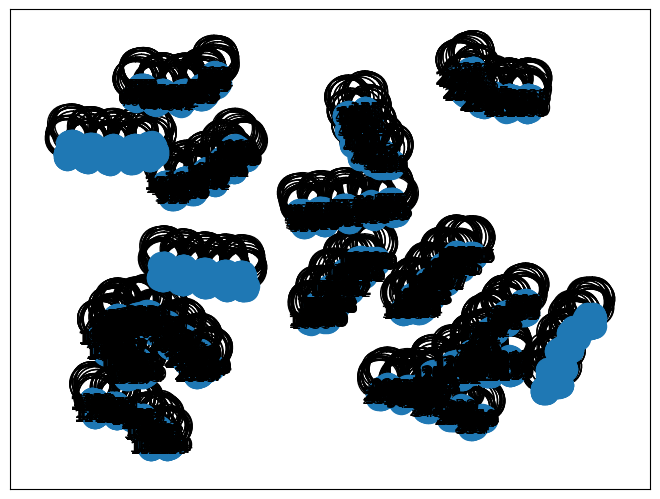

In [114]:
# Plot first batch

nx.draw(G, with_labels=True)

---

# Create Graphs

This will take a while, and i dont even know if it is going to work. jejeje

In [115]:
importlib.reload(models)

<module 'models' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\models.py'>

In [117]:
len(dataset_cloned)

93050

In [118]:
def concatenate_per_graph(embbed, batch):
    ''' Concatenate the embeddings per graph '''
    out = []
    for i in range(batch.max()+1):
        out.append(embbed[batch==i].flatten())
    return out

In [119]:
for data in train_loader:
    a = data
    break

In [120]:
a.behaviour.shape

torch.Size([16])

In [121]:
a.frame_mask.unique()

tensor([  21,   22,   23,   24,   25,  106,  107,  108,  109,  110,  545,  546,
         547,  548,  549,  662,  663,  664,  665,  666,  667,  668,  669,  670,
         671, 1002, 1003, 1004, 1005, 1006, 1188, 1189, 1190, 1191, 1192, 1262,
        1263, 1264, 1265, 1266, 1368, 1369, 1370, 1371, 1372, 1635, 1636, 1637,
        1638, 1639, 1711, 1712, 1713, 1714, 1715, 1863, 1864, 1865, 1866, 1867,
        2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2174, 2175, 2176,
        2177, 2178], dtype=torch.int32)

### Graph Classifier

In [122]:
graphencoder = models.GATEncoder(nout = 8, nhid=16, attention_hidden=2, n_in=4, dropout=0.5)
class_head = models.ClassificationHead(n_latent=576, nhid = 32, nout = 2)

In [123]:
lat = graphencoder(a.x, a.edge_index, a.frame_mask)

In [124]:
def concatenate_per_graph(embbed, batch, frame_mask):
        ''' Concatenate the embeddings per graph '''
        out = []
        for i in range(batch.max()+1):
            out.append(embbed[batch==i][frame_mask[batch==i] == frame_mask[batch==i].median()].flatten())
        return torch.stack(out)

In [125]:
lat.shape

torch.Size([2880, 16])

In [126]:
# Per node frame-level aggragation
embbed = concatenate_per_graph(lat, a.batch, a.frame_mask)

In [127]:
embbed.shape

torch.Size([16, 576])

In [128]:
out = class_head(embbed)

In [129]:
out.shape

torch.Size([16, 2])

In [130]:
model = models.GraphClassifier(graphencoder, class_head)

In [131]:
out = model(a)

In [132]:
out.shape

torch.Size([16, 2])

In [133]:
print('The model has %d trainable parameters' % sum(p.numel() for p in model.parameters() if p.requires_grad))

The model has 25626 trainable parameters


In [134]:
import tqdm

#### Trainning Loop

In [135]:
# Trainning loop
num_epochs = 10
lr = 0.01
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
writer = SummaryWriter(log_dir='runs/GAT_without_softmax')  # TensorBoard writer

In [136]:

# Training Loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    correct = 0
    total = 1
    i = 0

    for data in tqdm.tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(data)
        labels = data.behaviour
        print(labels.dtype)
        print(outputs.dtype)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
        train_loss += loss.item()
        predicted = outputs.argmax(dim=1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        # Log training loss and accuracy at each step
        if i % 10 == 0:  # Log every 10 iterations, adjust as needed
            writer.add_scalar('Loss/Train', loss.item(), epoch * len(train_loader) + i)
            writer.add_scalar('Accuracy/Train', correct / total, epoch * len(train_loader) + i)
            #print(f"Epoch {epoch+1}, Step {i}, Loss: {loss.item()}, Accuracy: {correct / total}")
        i += 1

    train_accuracy = correct / total
    avg_train_loss = train_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Training Loss: {avg_train_loss}, Training Accuracy: {train_accuracy}")

    # Validation phase
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for val_data in tqdm.tqdm(test_loader):
            val_outputs = model(val_data)
            val_labels = val_data.behaviour
            val_loss += criterion(val_outputs, val_labels).item()
            val_predicted = val_outputs.argmax(dim=1)
            correct += (val_predicted == val_labels).sum().item()
            total += val_labels.size(0)
    
    val_accuracy = correct / total
    avg_val_loss = val_loss / len(test_loader)
    
    print(f"Validation Loss: {avg_val_loss}, Validation Accuracy: {val_accuracy}")

    # Log validation metrics
    writer.add_scalar('Loss/Validation', avg_val_loss, epoch)
    writer.add_scalar('Accuracy/Validation', val_accuracy, epoch)

# Close the TensorBoard writer
writer.close()

  0%|          | 0/4653 [00:00<?, ?it/s]

  0%|          | 1/4653 [00:00<12:09,  6.38it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  0%|          | 4/4653 [00:00<09:27,  8.19it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  0%|          | 5/4653 [00:00<09:18,  8.32it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  0%|          | 8/4653 [00:01<10:15,  7.55it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  0%|          | 10/4653 [00:01<09:48,  7.89it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  0%|          | 12/4653 [00:01<09:34,  8.08it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  0%|          | 14/4653 [00:01<09:20,  8.28it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  0%|          | 16/4653 [00:02<09:20,  8.28it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  0%|          | 18/4653 [00:02<09:23,  8.23it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  0%|          | 20/4653 [00:02<09:28,  8.15it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  0%|          | 22/4653 [00:02<09:06,  8.48it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  0%|          | 23/4653 [00:02<10:54,  7.08it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 26/4653 [00:03<09:38,  8.00it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 28/4653 [00:03<09:23,  8.20it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 30/4653 [00:03<09:25,  8.18it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 32/4653 [00:04<09:28,  8.12it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 34/4653 [00:04<09:15,  8.31it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 36/4653 [00:04<08:59,  8.56it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 38/4653 [00:04<09:19,  8.24it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 39/4653 [00:04<09:38,  7.98it/s]

torch.int64
torch.float32


  1%|          | 41/4653 [00:05<11:16,  6.82it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 43/4653 [00:05<10:41,  7.19it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 45/4653 [00:05<09:59,  7.68it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 47/4653 [00:05<09:37,  7.97it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 48/4653 [00:06<09:38,  7.96it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 51/4653 [00:06<10:26,  7.34it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 53/4653 [00:06<10:08,  7.56it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 54/4653 [00:06<10:20,  7.41it/s]

torch.int64
torch.float32


  1%|          | 56/4653 [00:07<11:45,  6.51it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|          | 58/4653 [00:07<10:37,  7.21it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|▏         | 60/4653 [00:07<09:58,  7.68it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|▏         | 61/4653 [00:07<10:23,  7.37it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|▏         | 64/4653 [00:08<09:46,  7.82it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|▏         | 66/4653 [00:08<09:36,  7.96it/s]

torch.int64
torch.float32
torch.int64
torch.float32


  1%|▏         | 68/4653 [00:08<09:55,  7.71it/s]

torch.int64
torch.float32
torch.int64
torch.float32


KeyboardInterrupt: 

---

## Load trained model


In [84]:
def save_checkpoint(model, optimizer, epoch, loss, path):
    # Save the model, optimizer state, epoch, and loss
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }
    torch.save(checkpoint, path)
    print(f"Checkpoint saved at {path}")

In [85]:
# Load the model
def load_checkpoint(model, optimizer, path, device):
    checkpoint = torch.load(path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    print(f"Checkpoint loaded from {path}, at epoch {epoch}")
    return model, optimizer, epoch

In [86]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Load the data
dataset = torch.load(r'c:\Users\jalvarez\Documents\Data\Dataset_DMDmaleMDX5CVmalefem\dataset_large.pkl', map_location=device)

# Suffle the dataset
np.random.seed(0)
np.random.shuffle(dataset)

# Split train and test
train_size = int(0.8 * len(dataset))

train_dataset = dataset[:train_size]
test_dataset = dataset[train_size:]

print('The train dataset has %d samples' % len(train_dataset))
print('The test dataset has %d samples' % len(test_dataset))



cpu


KeyboardInterrupt: 

In [44]:
len(dataset)

226040

In [45]:
# get only the behaviour of interest
idx_to_keep = []
for i in range(len(dataset)):
    # If NaN, discard the sample
    if dataset[i].behaviour[2] != 0 and dataset[i].behaviour[2] != 1:
        continue
    else:
        dataset[i].behaviour = dataset[i].behaviour[2]
        idx_to_keep.append(i)

In [46]:
test_dataset = [dataset[i] for i in idx_to_keep]

In [47]:
len(test_dataset)

141897

In [48]:
# Delete the dataset
del dataset

In [20]:

batch_size = 32

# Create the dataloaders for train, validation and test
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


c:\Users\jalvarez\AppData\Local\anaconda3\envs\projenv\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


GraphClassifier(
  (encoder): GATEncoder(
    (relu): ReLU()
    (gatenc1): GATv2Conv(4, 16, heads=2)
    (gatenc2): GATv2Conv(32, 16, heads=2)
    (gatenc3): GATv2Conv(32, 16, heads=2)
    (res_conn): ModuleList(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU()
    )
  )
  (classifier): ClassificationHead(
    (hidden1): Linear(in_features=576, out_features=32, bias=True)
    (hidden2): Linear(in_features=32, out_features=32, bias=True)
    (hidden3): Linear(in_features=32, out_features=2, bias=True)
    (relu): ReLU()
  )
)

In [50]:
importlib.reload(models)
# Define the model
graphencoder = models.GATEncoder(nout = 8, nhid=16, attention_hidden=2, n_in=4, dropout=0.5)
class_head = models.ClassificationHead(n_latent=576, nhid = 32, nout = 2)

model = models.GraphClassifier(graphencoder, class_head)

model.to(device)


GraphClassifier(
  (encoder): GATEncoder(
    (relu): ReLU()
    (gatenc1): GATv2Conv(4, 16, heads=2)
    (gatenc2): GATv2Conv(32, 16, heads=2)
    (gatenc3): GATv2Conv(32, 16, heads=2)
    (res_conn): ModuleList(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU()
    )
  )
  (classifier): ClassificationHead(
    (hidden1): Linear(in_features=576, out_features=32, bias=True)
    (hidden2): Linear(in_features=32, out_features=32, bias=True)
    (hidden3): Linear(in_features=32, out_features=2, bias=True)
    (relu): ReLU()
  )
)

In [51]:
checkpoint = torch.load(r'c:\Users\jalvarez\Documents\Data\Checkpoints\Following\checkpoint_epoch_200.pth', map_location=device)

In [52]:
checkpoint['model_state_dict'].keys()

odict_keys(['encoder.gatenc1.att', 'encoder.gatenc1.bias', 'encoder.gatenc1.lin_l.weight', 'encoder.gatenc1.lin_l.bias', 'encoder.gatenc1.lin_r.weight', 'encoder.gatenc1.lin_r.bias', 'encoder.gatenc2.att', 'encoder.gatenc2.bias', 'encoder.gatenc2.lin_l.weight', 'encoder.gatenc2.lin_l.bias', 'encoder.gatenc2.lin_r.weight', 'encoder.gatenc2.lin_r.bias', 'encoder.gatenc3.att', 'encoder.gatenc3.bias', 'encoder.gatenc3.lin_l.weight', 'encoder.gatenc3.lin_l.bias', 'encoder.gatenc3.lin_r.weight', 'encoder.gatenc3.lin_r.bias', 'encoder.res_conn.0.weight', 'encoder.res_conn.0.bias', 'classifier.hidden1.weight', 'classifier.hidden1.bias', 'classifier.hidden2.weight', 'classifier.hidden2.bias', 'classifier.hidden3.weight', 'classifier.hidden3.bias'])

In [53]:
# Try on the entire dataset

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


c:\Users\jalvarez\AppData\Local\anaconda3\envs\projenv\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [54]:
lr = 0.001
optimizer = optim.Adam(model.parameters(), lr=lr)


In [55]:
# Load the model
checkpoint_path = r'c:\Users\jalvarez\Documents\Data\Checkpoints\Following\checkpoint_epoch_200.pth'
model, optimizer, start_epoch = load_checkpoint(model, optimizer, checkpoint_path, device)

Checkpoint loaded from c:\Users\jalvarez\Documents\Data\Checkpoints\Following\checkpoint_epoch_200.pth, at epoch 200


In [83]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for val_data in tqdm.tqdm(test_loader):
        val_outputs = model(val_data)
        val_labels = val_data.behaviour
        val_predicted = val_outputs.argmax(dim=1)
        y_true.extend(val_labels.tolist())
        y_pred.extend(val_predicted.tolist())

  0%|          | 11/4435 [00:03<23:28,  3.14it/s]


KeyboardInterrupt: 

In [57]:
val_data.behaviour[1]

tensor(0)

In [82]:
print('Ther are %d samples' % len(y_true))
print('There are %d cases of not following' % y_true.count(0))
print('There are %d cases of following' % y_true.count(1))

Ther are 141897 samples
There are 132887 cases of not following
There are 9010 cases of following


In [58]:
# accuracy
correct = sum([1 for i in range(len(y_true)) if y_true[i] == y_pred[i]])
accuracy = correct / len(y_true)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8929223309865607


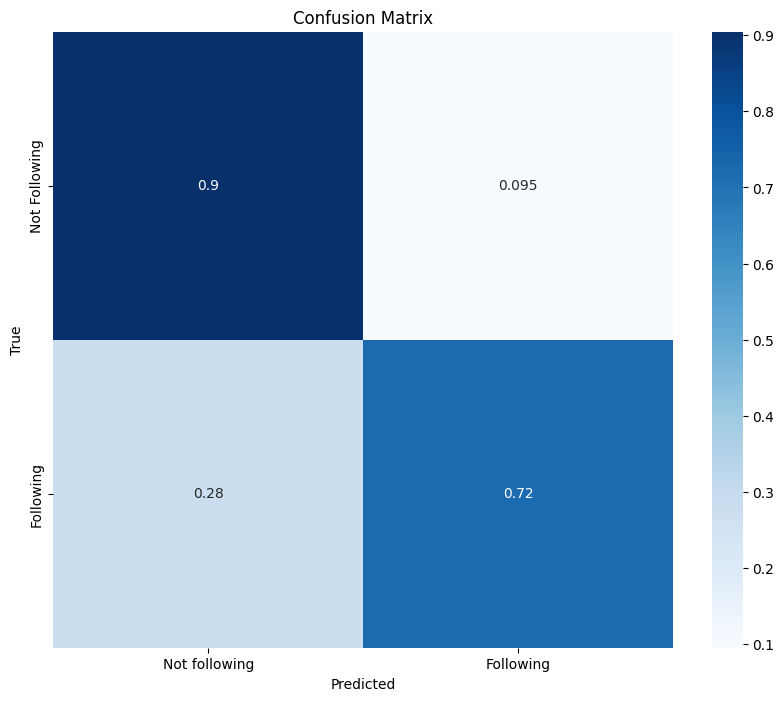

In [60]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Percentage plot of the confusion matrix
cm = cm / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Not following', 'Following'], yticklabels=['Not Following', 'Following'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [65]:
import augmentation

In [72]:
# Load the data
dataset = torch.load(r'c:\Users\jalvarez\Documents\Data\Dataset_DMDmaleMDX5CVmalefem\dataset_large.pkl', map_location=device)

# Select the behaviour to classify (Dominance in this case)
indx_behaviour1 = 3
indx_behaviour2 = 8

# Suffle the dataset
np.random.seed(0)
np.random.shuffle(dataset)


In [73]:
# get only the behaviour of interest
idx_to_keep = []
for i in range(len(dataset)):
    # If NaN, discard the sample
    if dataset[i].behaviour[2] != 0 and dataset[i].behaviour[2] != 1:
        continue
    else:
        idx_to_keep.append(i)

In [74]:
dataset = [dataset[i] for i in idx_to_keep]

In [75]:

# Split train and test
train_size = int(0.8 * len(dataset))

train_dataset = dataset[:train_size]
test_dataset = dataset[train_size:]


In [76]:
print(len(dataset))
print(train_size)

141897
113517


In [77]:


print('Merging the behaviours')
augmentation.merge_symetric_behaviours(indx_behaviour1, indx_behaviour2, train_dataset)
print('Generating rotation augmentation')
# Rotate the dataset
augmentation.rotate_samples(train_dataset, indx_behaviour1)
print('Downsampling the inactive behaviours')
train_dataset = augmentation.downsample_inactive(train_dataset, indx_behaviour1)

for i in range(len(train_dataset)):
    train_dataset[i].behaviour = train_dataset[i].behaviour[indx_behaviour1]
for i in range(len(test_dataset)):
    test_dataset[i].behaviour = test_dataset[i].behaviour[indx_behaviour1]
print('Done selecting the behaviour')


Merging the behaviours
Generating rotation augmentation
Downsampling the inactive behaviours
Done selecting the behaviour


In [78]:
# Discard NaNs samples

In [79]:
print('The train dataset has %d samples' % len(train_dataset))
print('The test dataset has %d samples' % len(test_dataset))

The train dataset has 90550 samples
The test dataset has 28380 samples


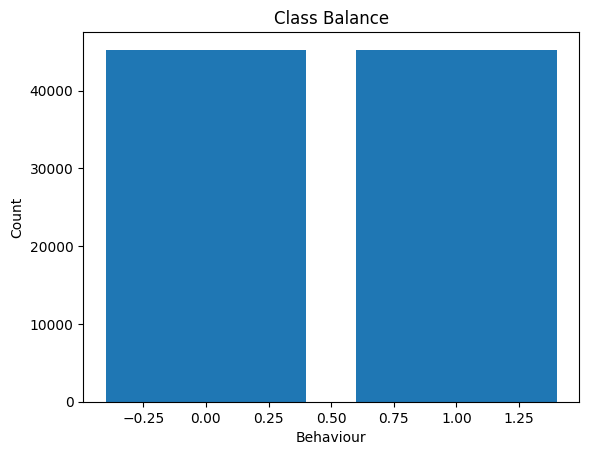

In [80]:
# Class balance
behaviour = [d.behaviour for d in train_dataset]
behaviour = np.array(behaviour)
behaviour = np.unique(behaviour, return_counts=True)
# Plot
plt.bar(behaviour[0], behaviour[1])
plt.xlabel('Behaviour')
plt.ylabel('Count')
plt.title('Class Balance')
plt.show()


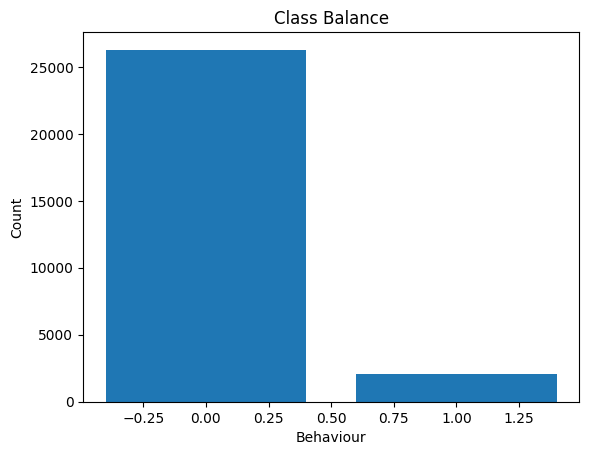

In [81]:
# class balance test
behaviour = [d.behaviour for d in test_dataset]
behaviour = np.array(behaviour)
behaviour = np.unique(behaviour, return_counts=True)
# Plot
plt.bar(behaviour[0], behaviour[1])
plt.xlabel('Behaviour')
plt.ylabel('Count')
plt.title('Class Balance')
plt.show()


---

---

---

---

---

---

#### eDIT NAMES

In [23]:
path = r'c:\Users\jalvarez\Documents\Data\DEEPLABCUT_needs_this_folder_I_dont_like_dlc'

# replace ' ' by '_'
for filename in os.listdir(path):
    os.rename(os.path.join(path, filename), os.path.join(path, filename.replace(' ', '_')))

---

In [48]:
import pandas as pd

In [54]:
data_dlc = DataDLC.DataDLC(r'c:\Users\jalvarez\Documents\Data\DataLoadaerTESTTSTST\DMD_mal_Test_1DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5')

data_dlc.drop_tail_bodyparts()

coords = data_dlc.coords.to_numpy()

In [61]:
coords.shape
# Reshape coords as (n_frames, n_individuals, n_bodyparts, 3)
coords = coords.reshape((coords.shape[0], data_dlc.n_individuals, data_dlc.n_body_parts, 3))

dtype('float64')